# EDA research 2

In this exploratory data analysis, we are gonna explore the following.
1. We are gonna implement the same steps as eda_res_1 jupyter notebook, without plotting the correlation matrices.
2. We will see each of the value ranges and identify which features are discrete and continuous.
3. Use a standard scaler for the continous features; and then plot the distributions.
4. Plot the correlation matrix against `is_fraud` to see how related are.

In [2]:
### Import the necessary modules
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the root project path
root_project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

#Append it to sys
sys.path.append(root_project_path)

#Import the necessary modules
from utils import DataLoader, CreditCardPreprocesser

### Load the data and obtain the preprocessed dataset

In [3]:
#Set the folder name and data folder
folder_name = "data"
data_holder_path = os.path.join(os.getcwd(), os.pardir)

#Set the folder name
data_loader = DataLoader(data_folder_name=folder_name,\
    data_folder_path=data_holder_path)

#Get the data
df_data = data_loader.get_dataset()

#Create an instance of the Credit card processer
credit_card_processer = CreditCardPreprocesser(df_data=df_data)

#Obtain the df_preprocessed
df_preprocessed = credit_card_processer.fetch_preprocessed_dataframe()

In [4]:
df_preprocessed.shape

(1296675, 96)

In [5]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 96 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   amt                      1296675 non-null  float64
 2   gender                   1296675 non-null  int64  
 3   zip                      1296675 non-null  int64  
 4   lat                      1296675 non-null  float64
 5   long                     1296675 non-null  float64
 6   city_pop                 1296675 non-null  int64  
 7   unix_time                1296675 non-null  int64  
 8   merch_lat                1296675 non-null  float64
 9   merch_long               1296675 non-null  float64
 10  is_fraud                 1296675 non-null  int64  
 11  merch_zipcode            1296675 non-null  float64
 12  transaction_year         1296675 non-null  int32  
 13  transaction_month        1296675 non-null 

### Lets select the X and Y target

In [6]:
X: pd.DataFrame = df_preprocessed[[col for col in df_preprocessed.columns if col != "is_fraud"]]
y: pd.DataFrame = df_preprocessed["is_fraud"]

### We know its imbalanced, so lets balance it out

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [8]:
#Obtain the over sampled new values
X_smote, y_smote = smote.fit_resample(X.astype("float"), y)

### Lets take a look at the new smoted data vs original data

In [9]:
X_smote.head(5)

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,first_encoded,first_freq,last_encoded,last_freq,street_encoded,street_freq,city_encoded,city_freq,job_encoded,job_freq
0,2.703186e+15,4.97,1.0,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,...,0.007261,16940.0,0.000000,2028.0,0.000000,2028.0,0.000000,2028.0,0.001693,3545.0
1,6.304233e+11,107.23,1.0,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,...,0.003559,10678.0,0.002633,3038.0,0.000000,3030.0,0.000000,3545.0,0.002157,5099.0
2,3.885949e+13,220.11,0.0,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,...,0.001288,3106.0,0.008763,7075.0,0.000000,503.0,0.000000,503.0,0.015656,511.0
3,3.534094e+15,45.00,0.0,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,...,0.010373,7134.0,0.006576,7147.0,0.030426,493.0,0.030426,493.0,0.007905,2530.0
4,3.755342e+14,41.96,0.0,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,...,0.001805,6647.0,0.008709,9186.0,0.000000,2017.0,0.000000,2017.0,0.000000,2017.0


In [19]:
import numpy as np
def create_scatter(data, col):
    plt.figure()
    plt.scatter(np.arange(0, len(data)), data)
    plt.title(f"Col: {col}")

C:\Users\ajedr\AppData\Local\Temp\ipykernel_9340\1528862136.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


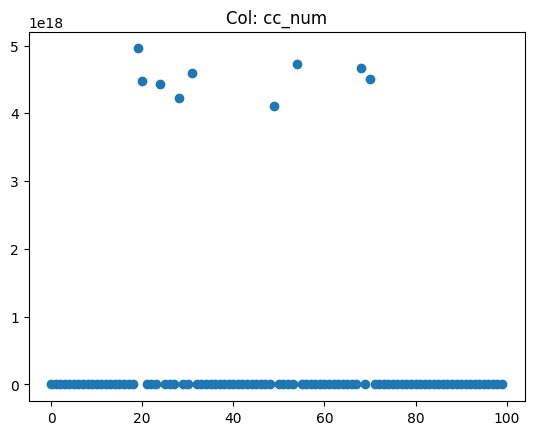

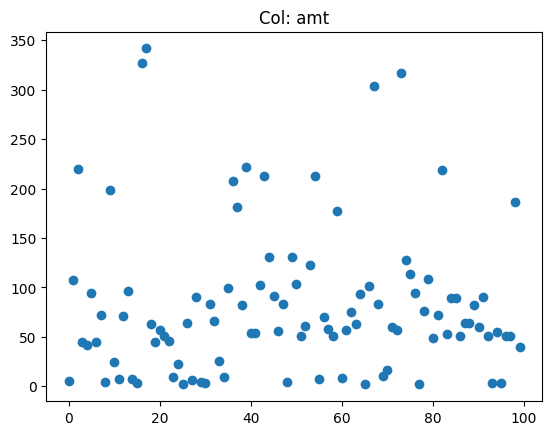

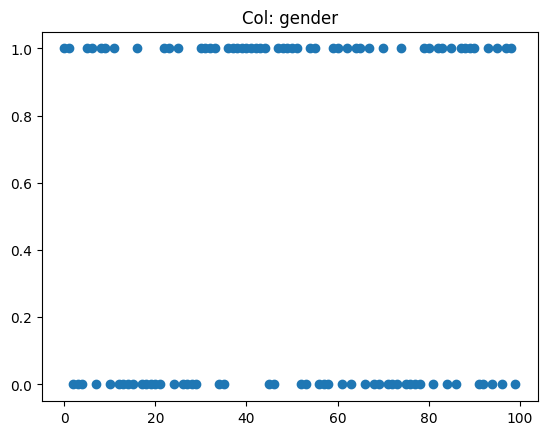

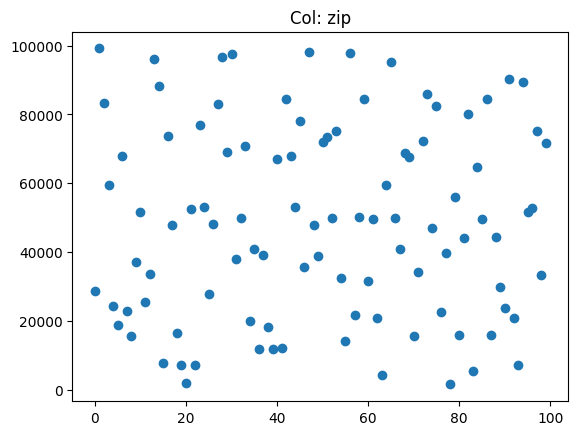

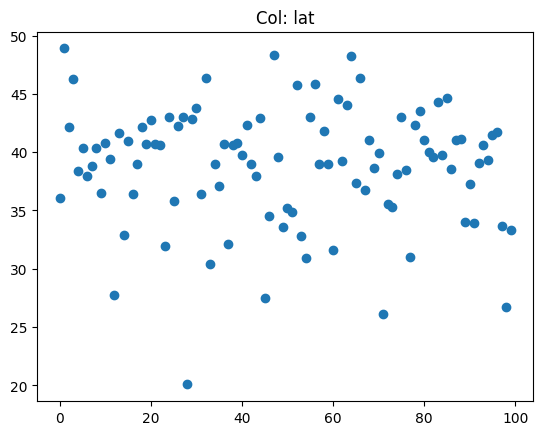

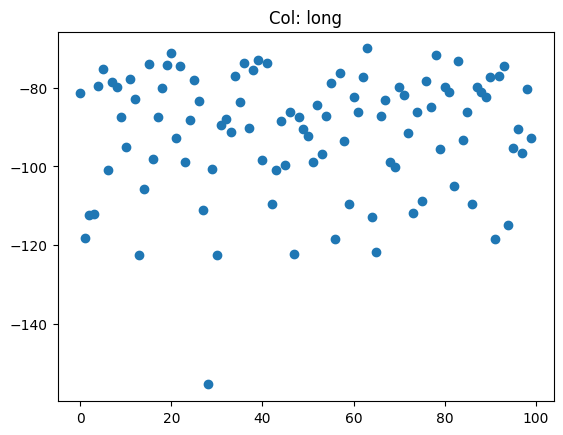

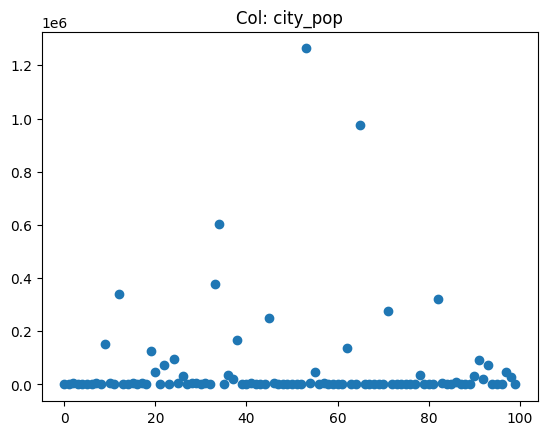

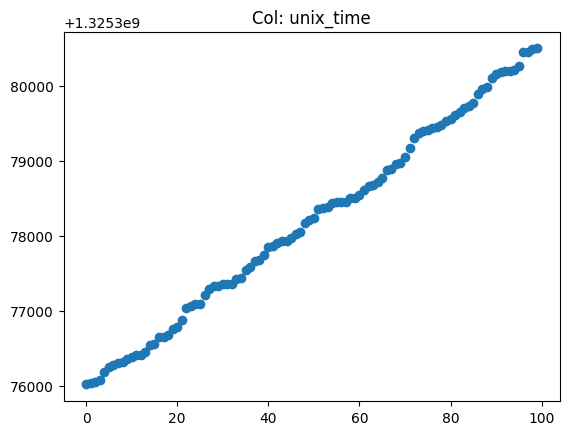

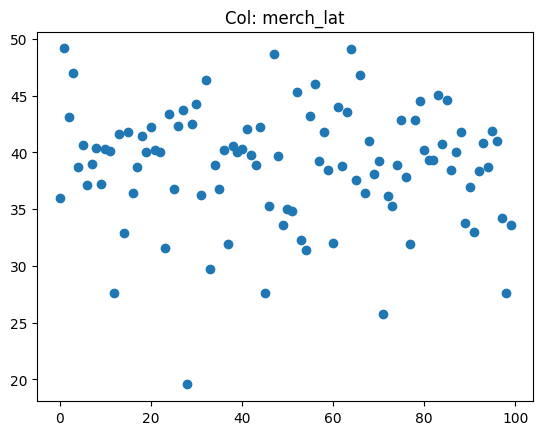

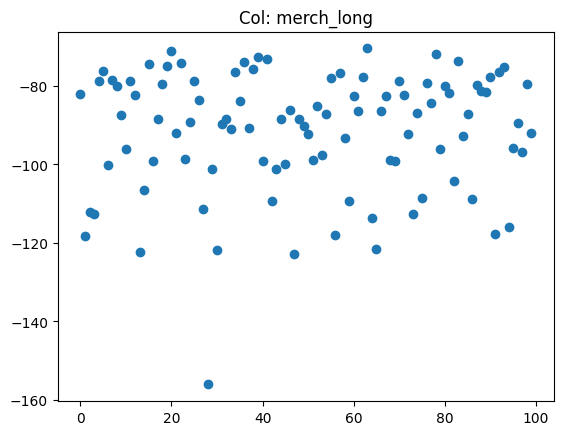

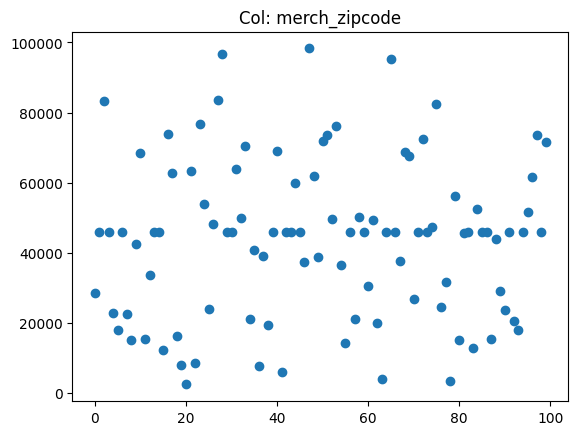

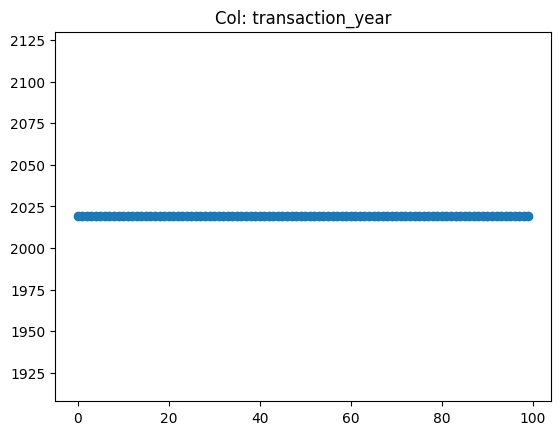

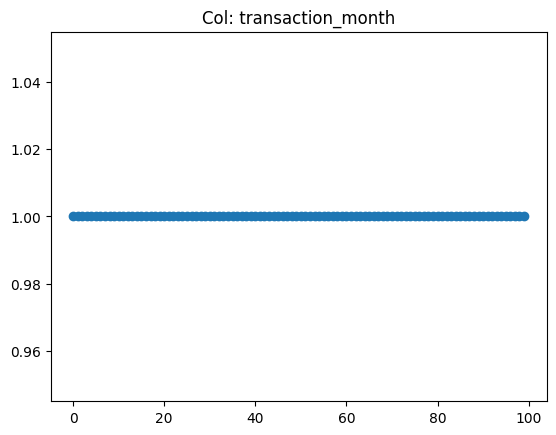

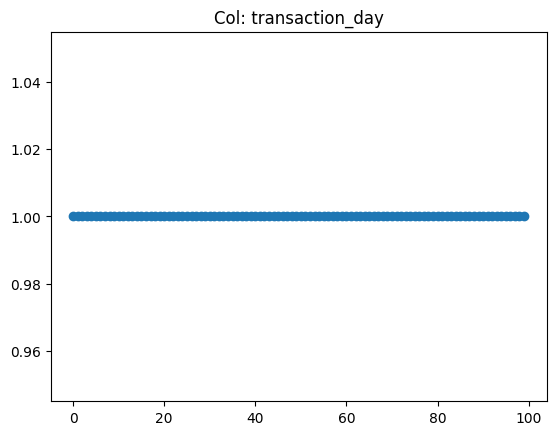

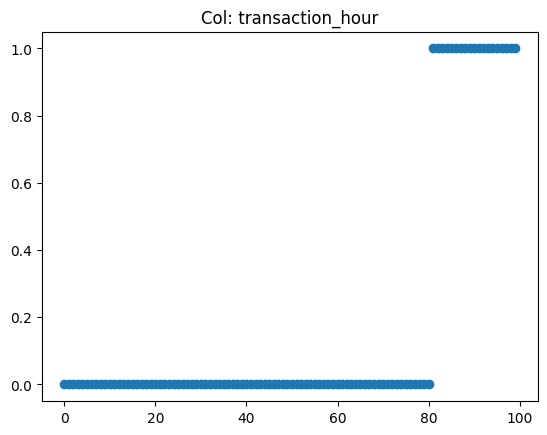

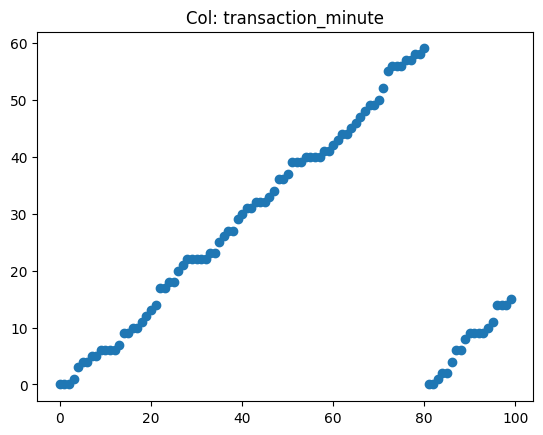

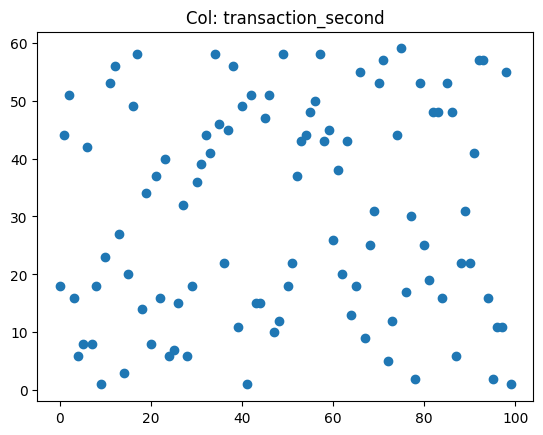

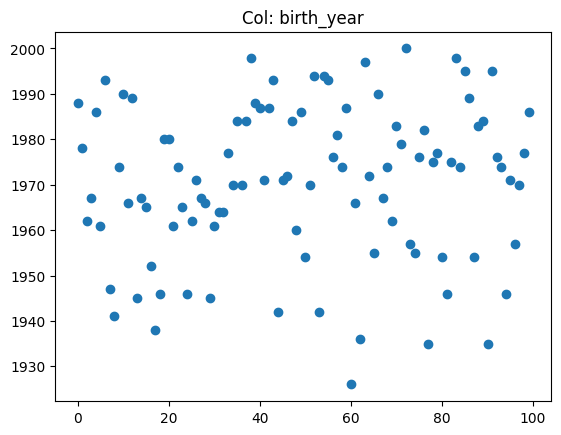

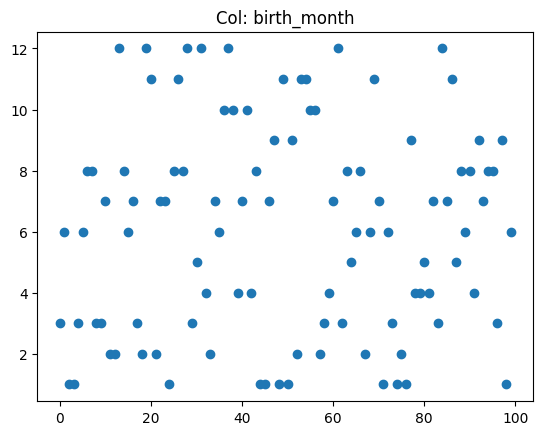

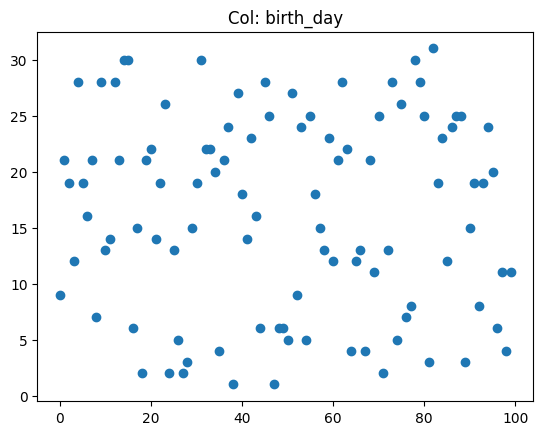

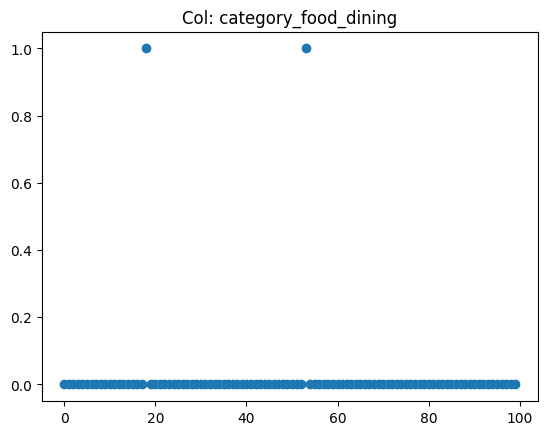

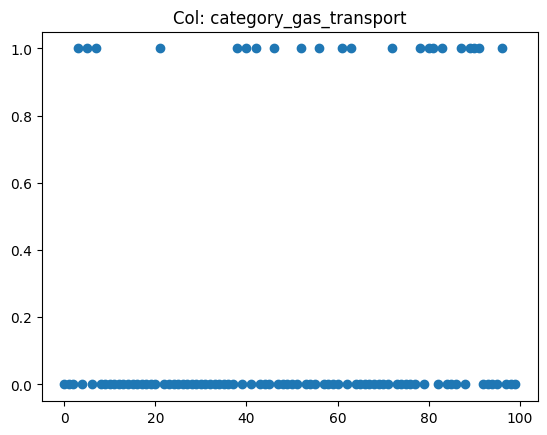

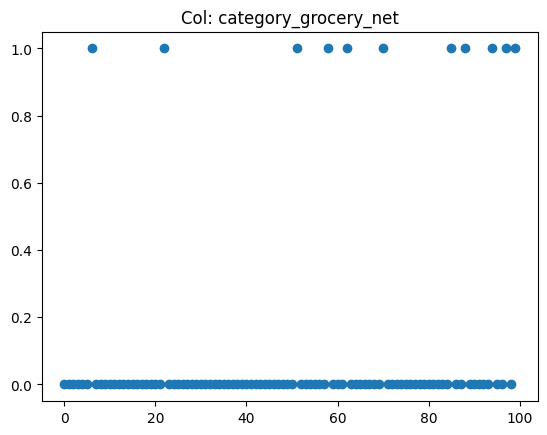

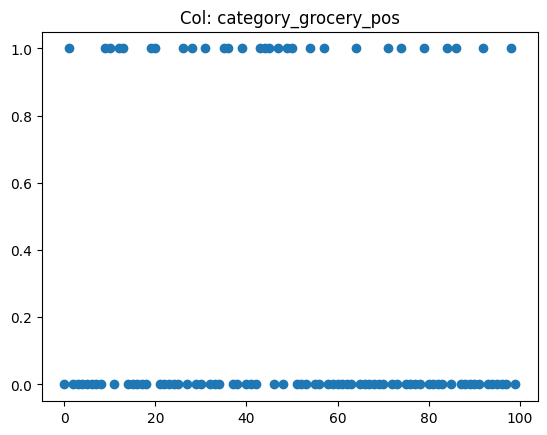

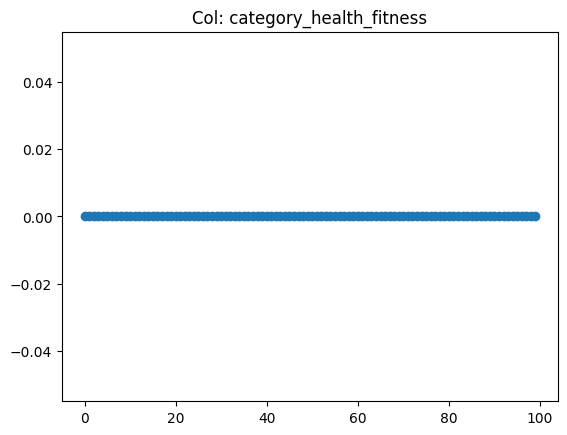

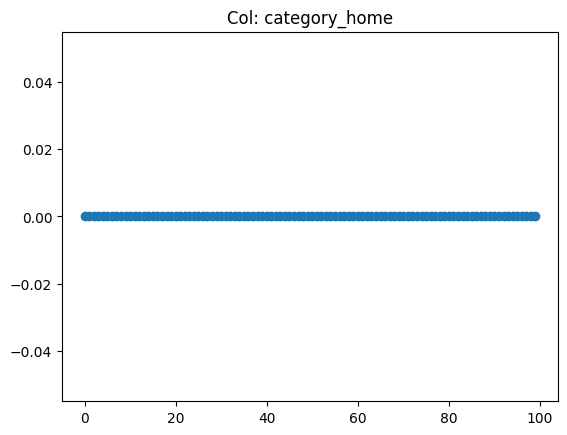

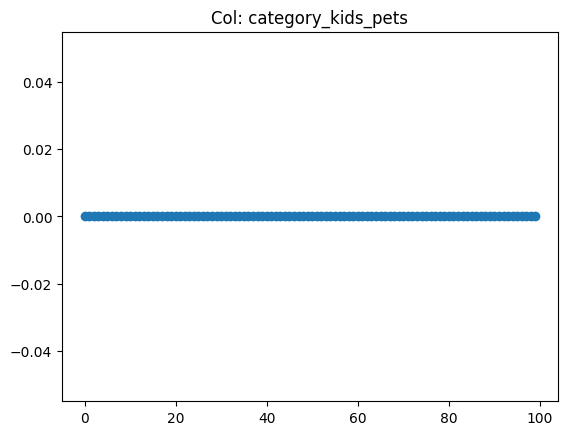

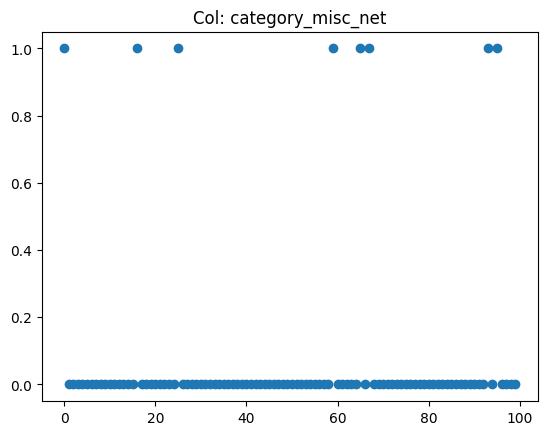

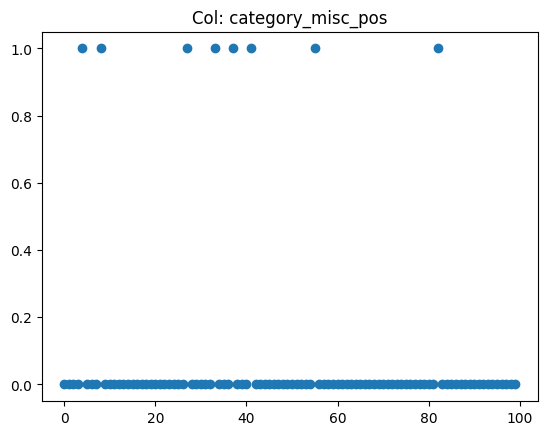

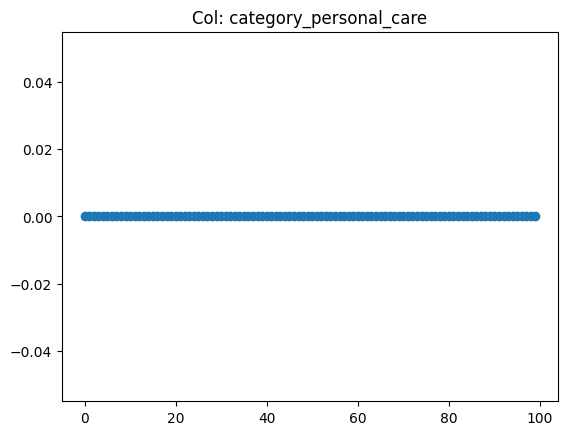

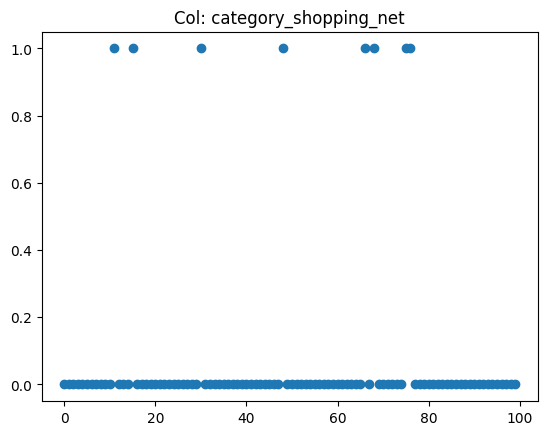

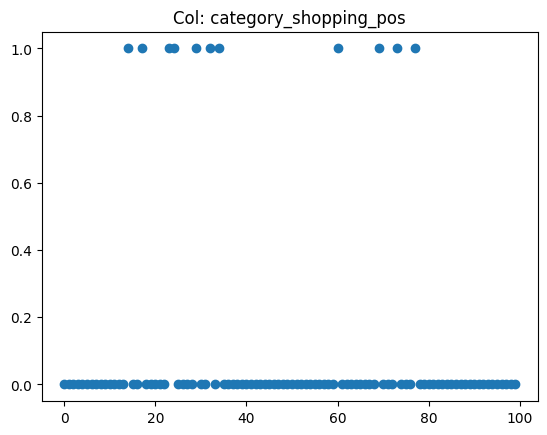

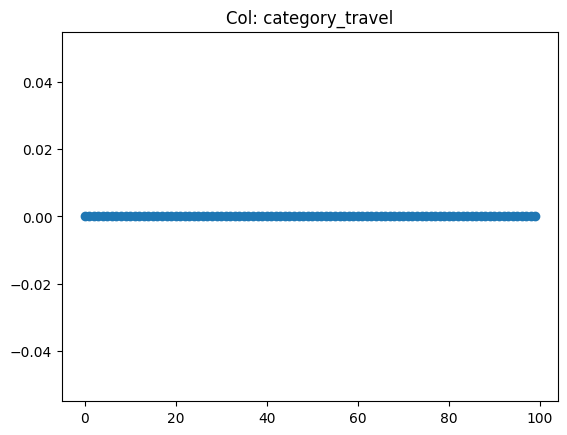

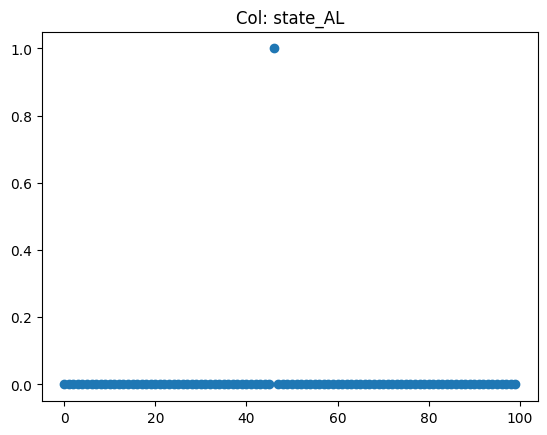

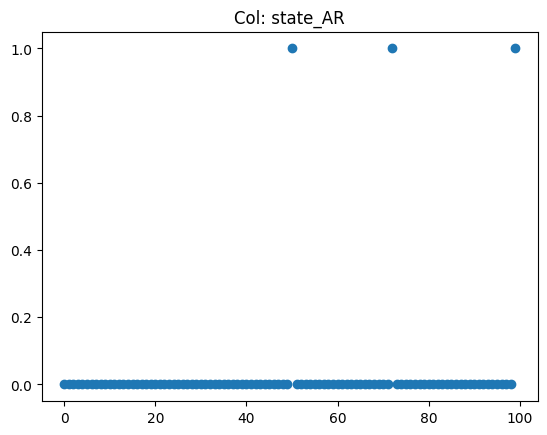

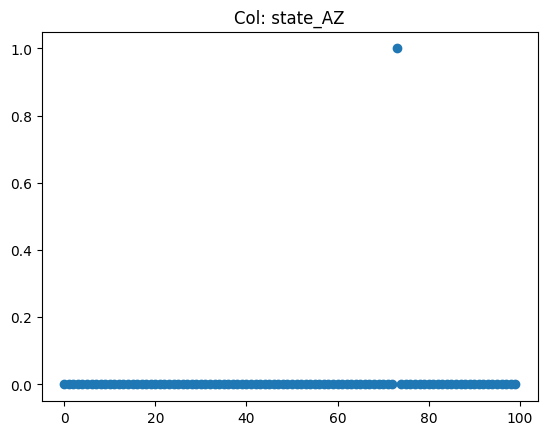

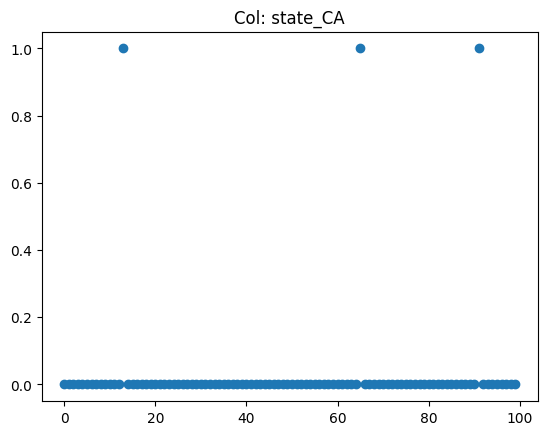

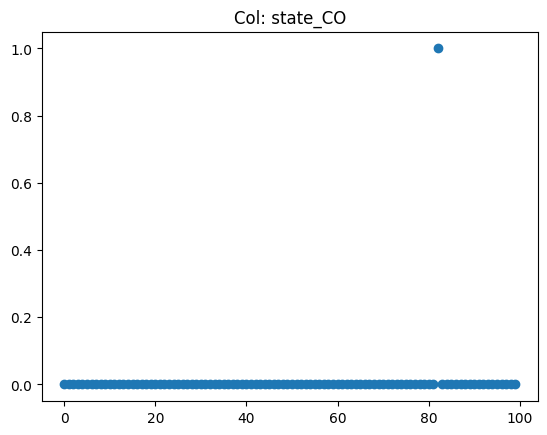

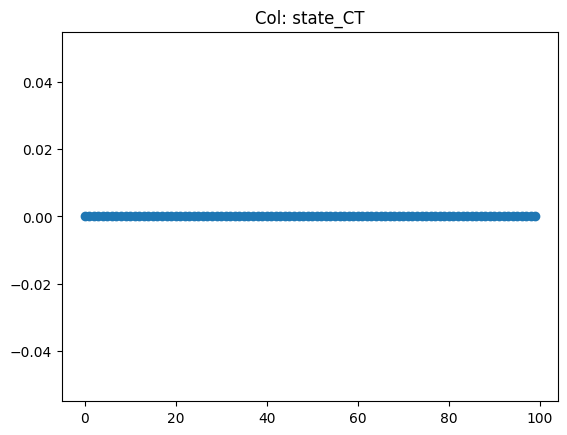

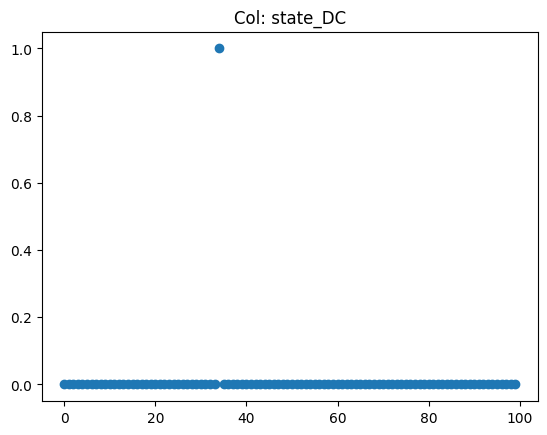

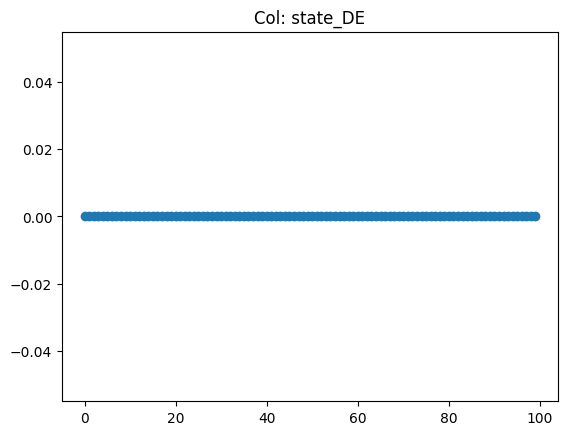

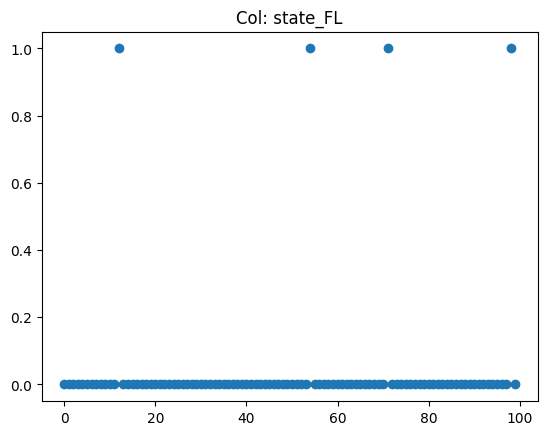

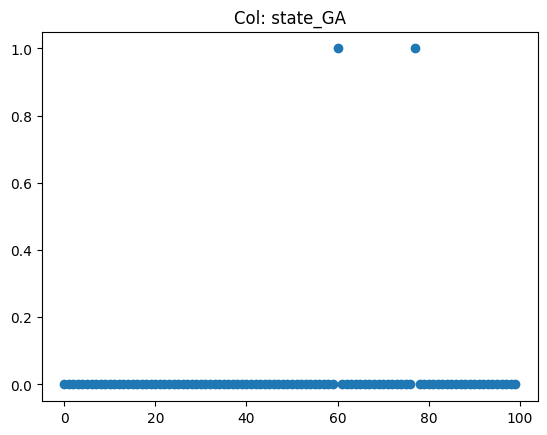

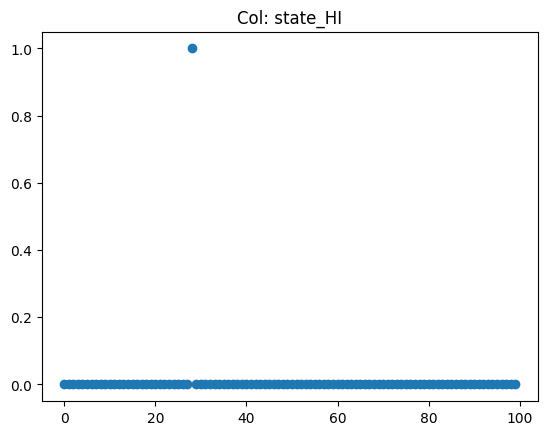

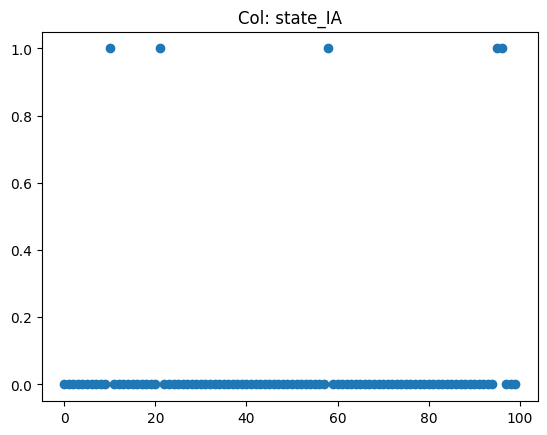

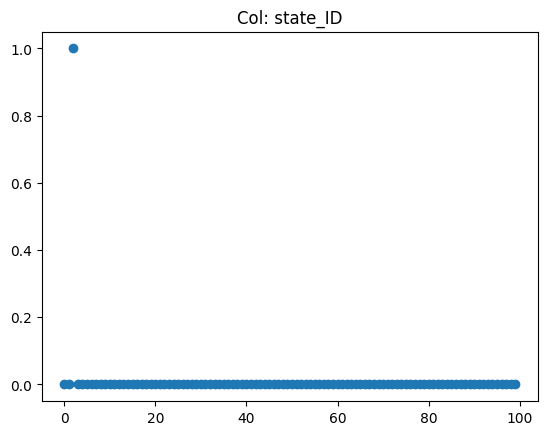

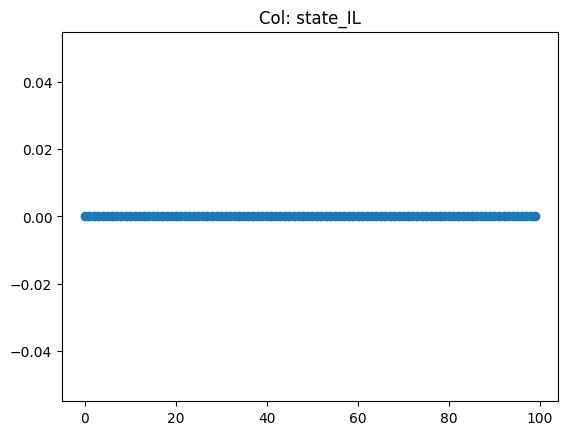

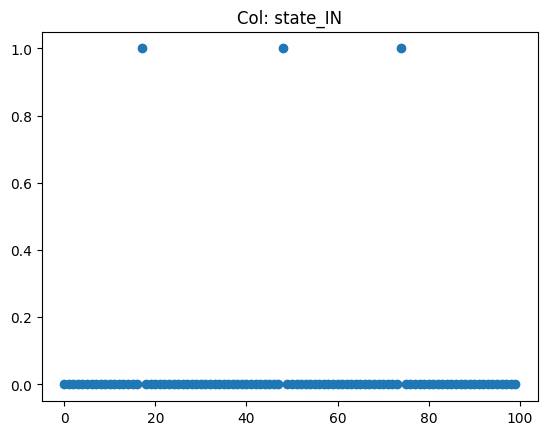

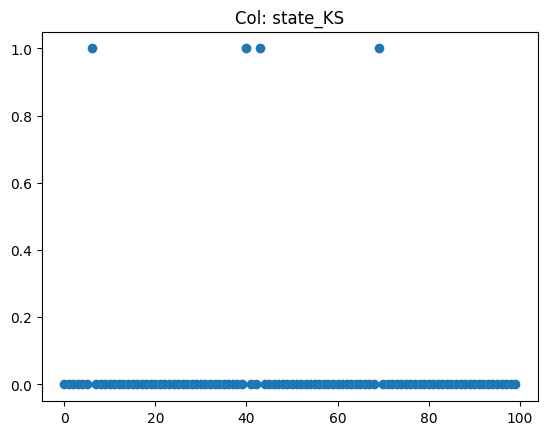

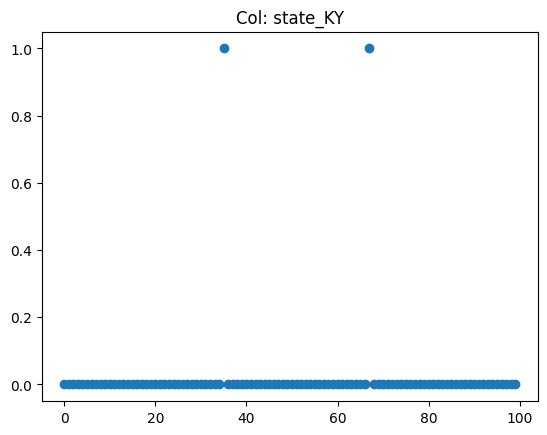

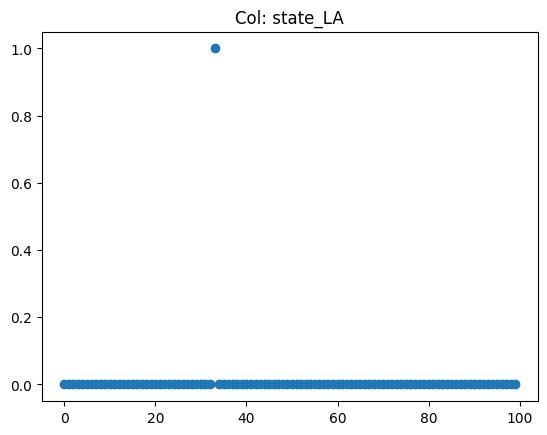

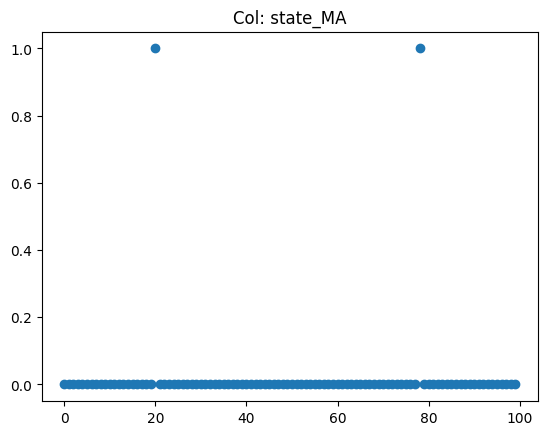

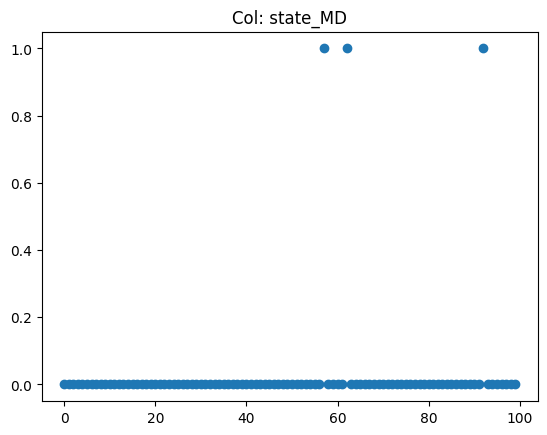

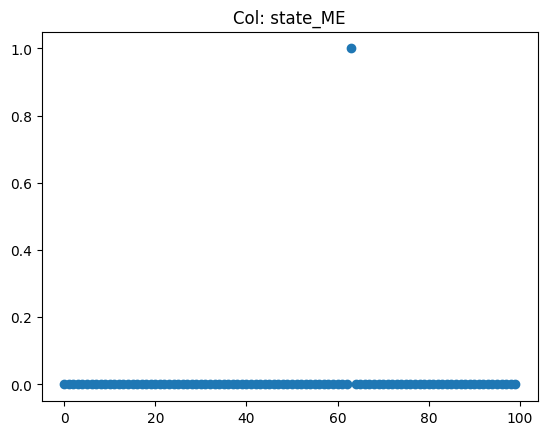

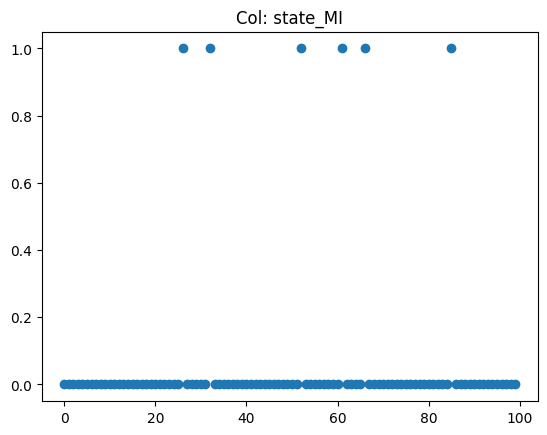

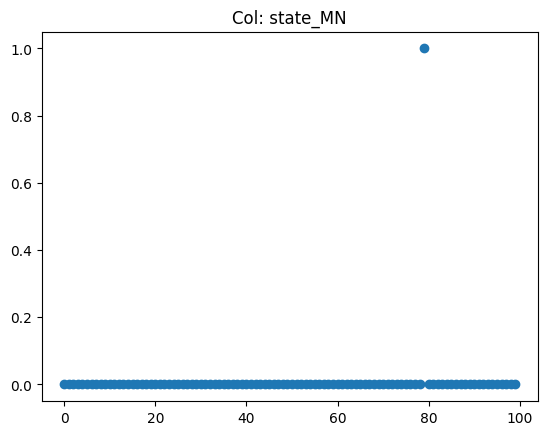

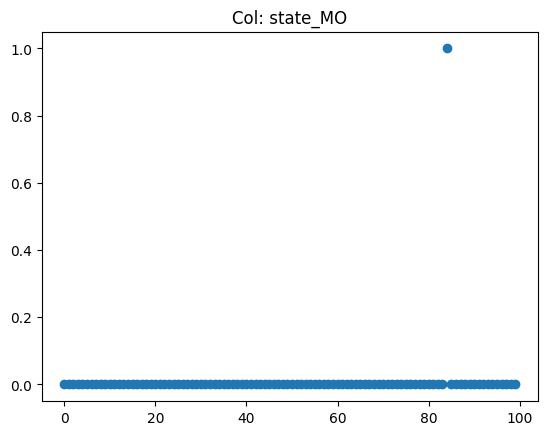

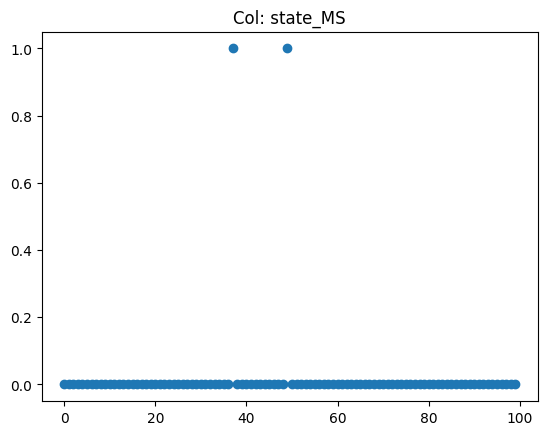

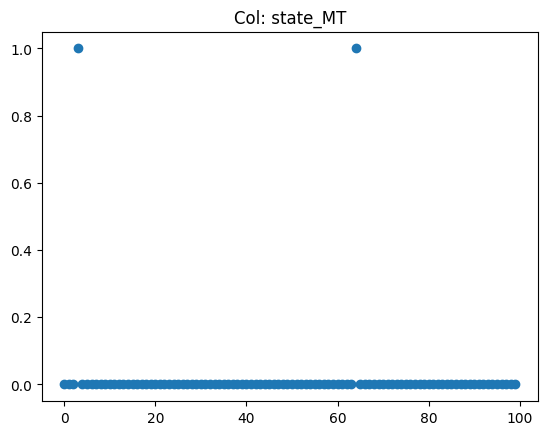

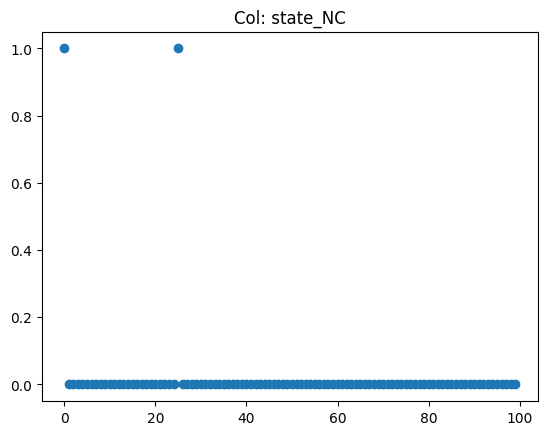

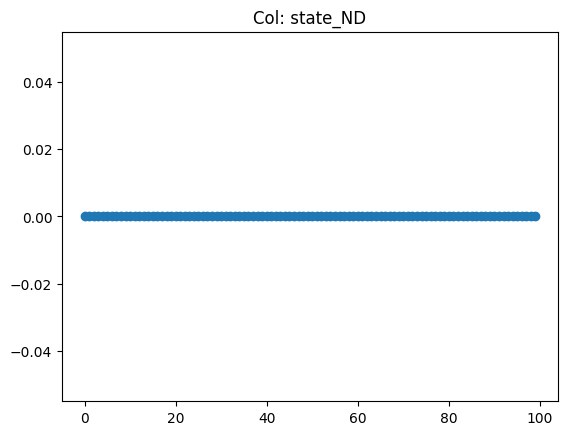

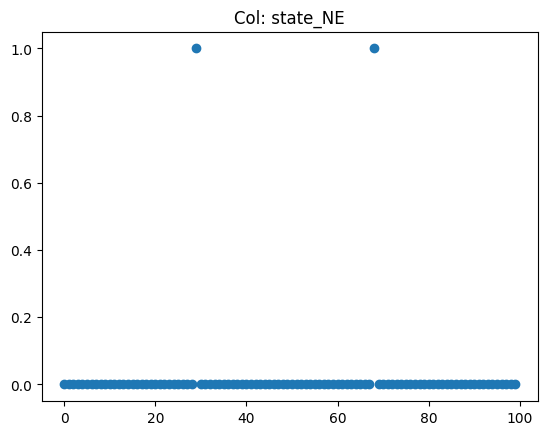

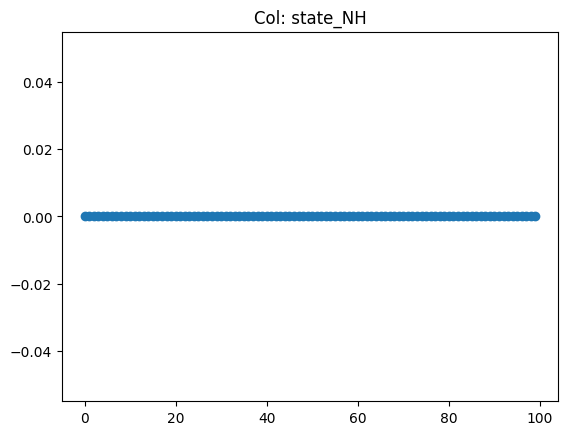

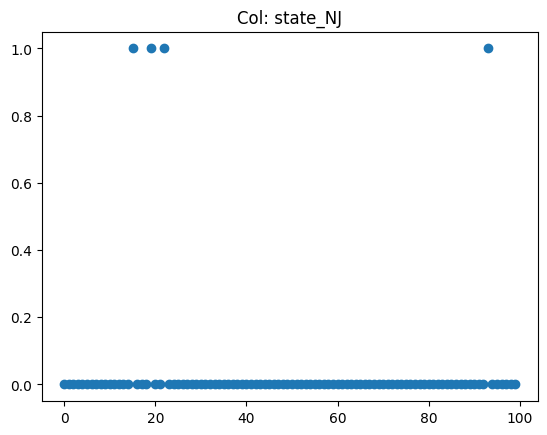

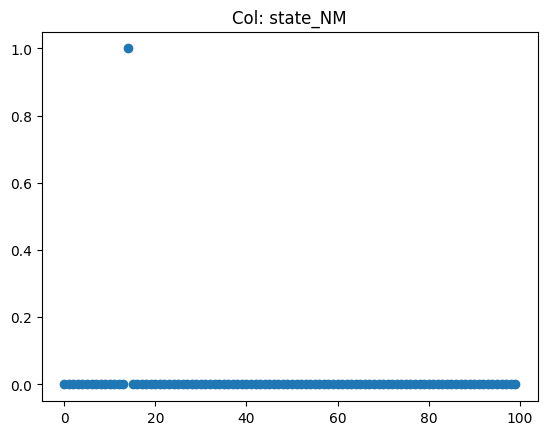

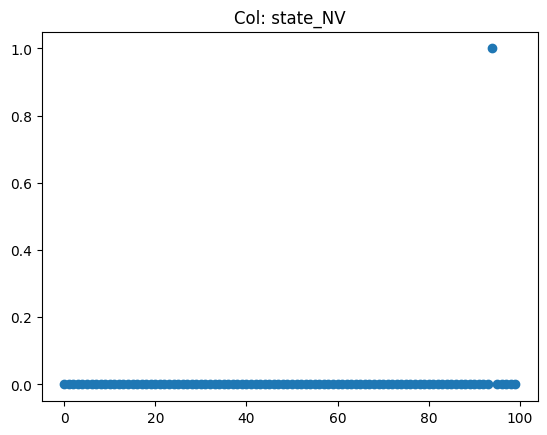

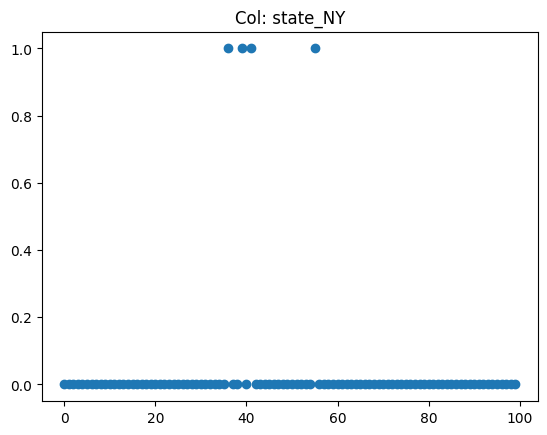

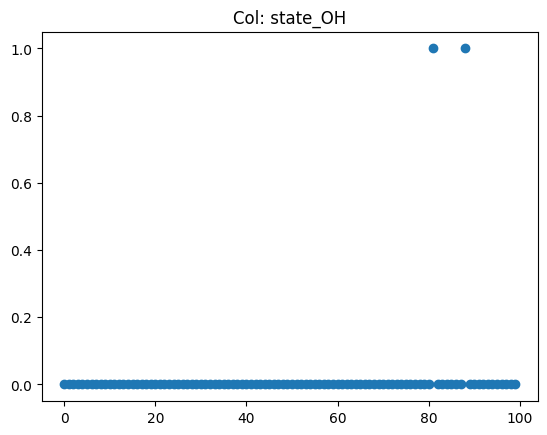

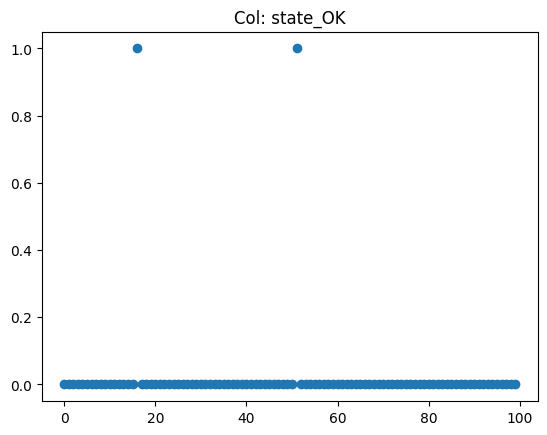

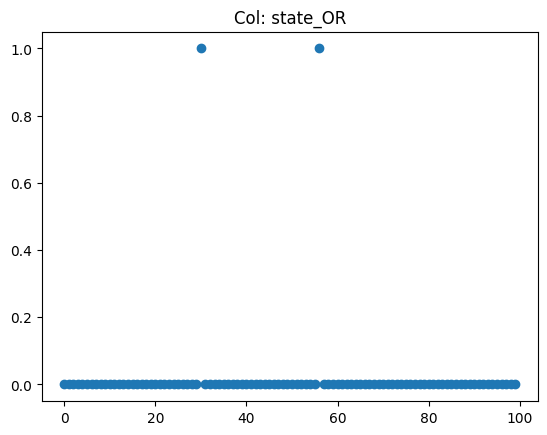

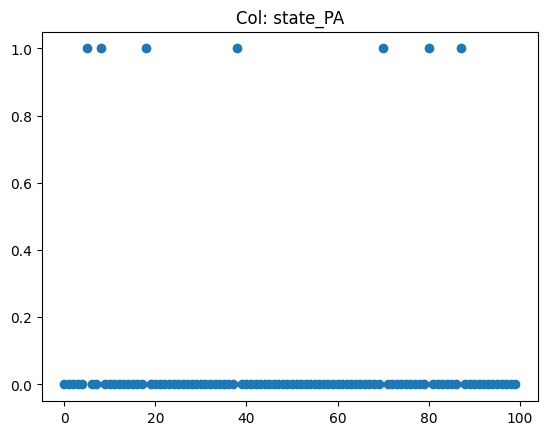

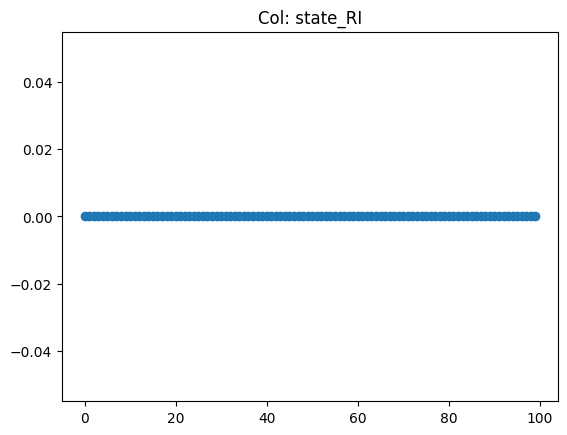

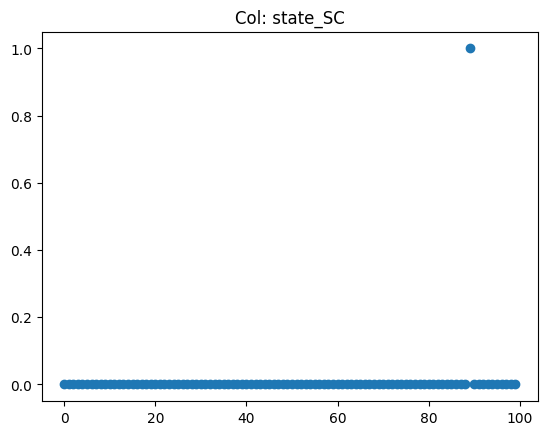

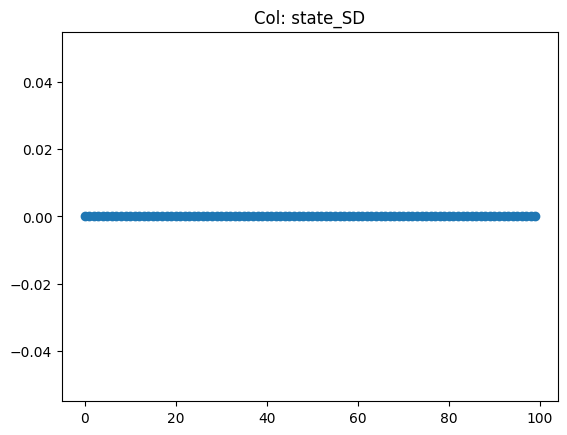

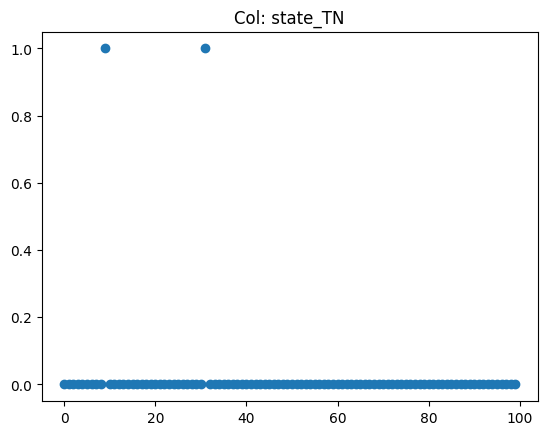

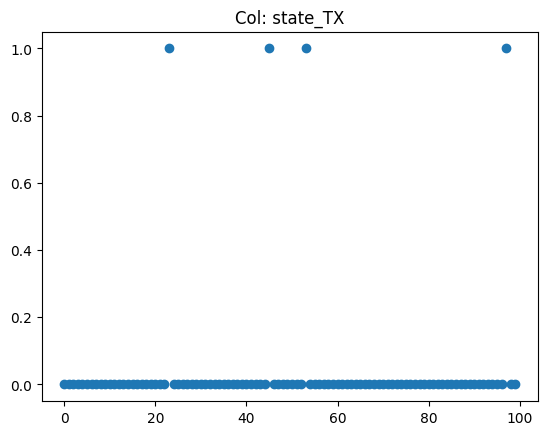

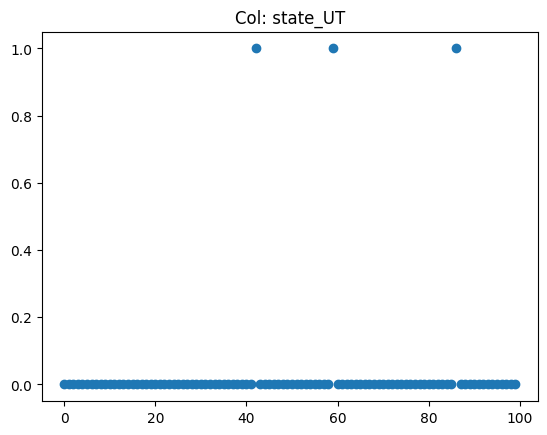

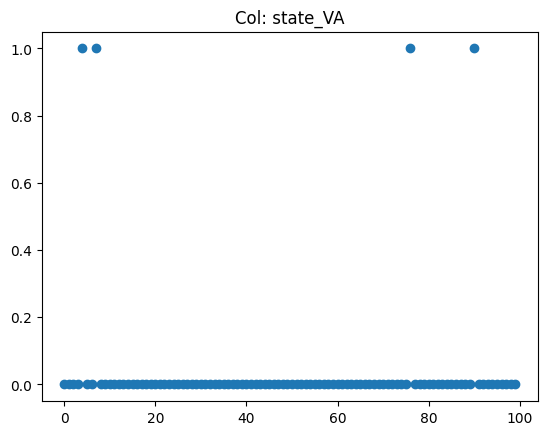

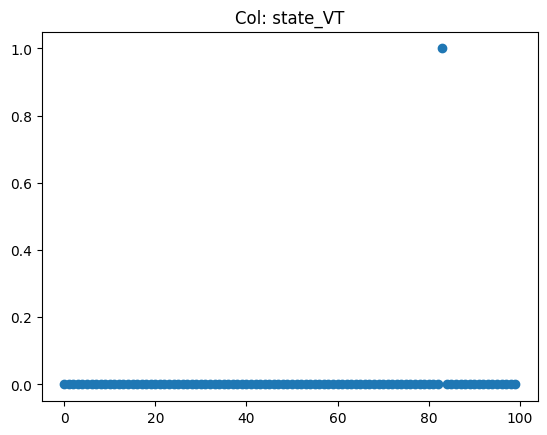

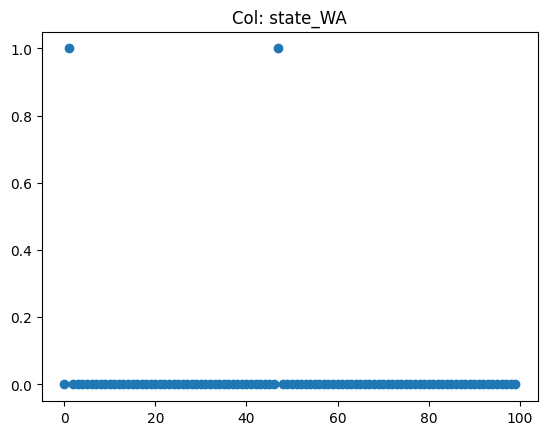

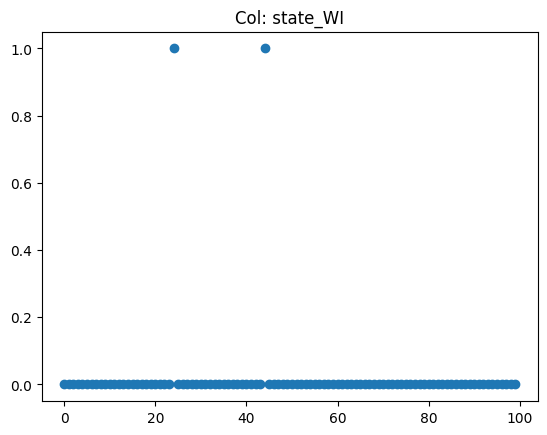

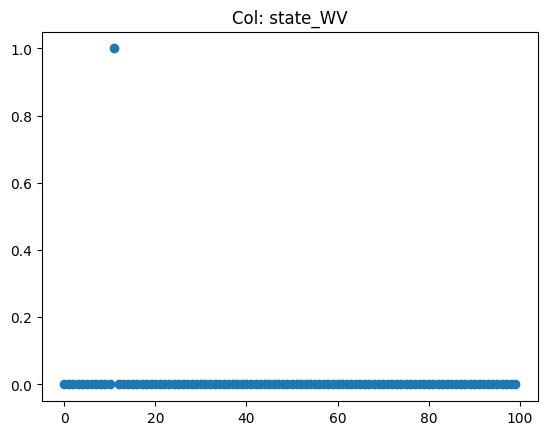

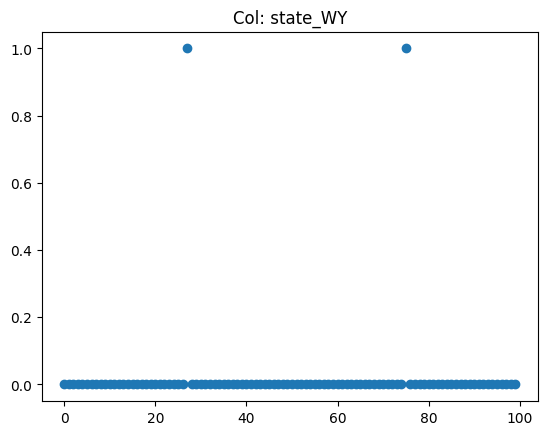

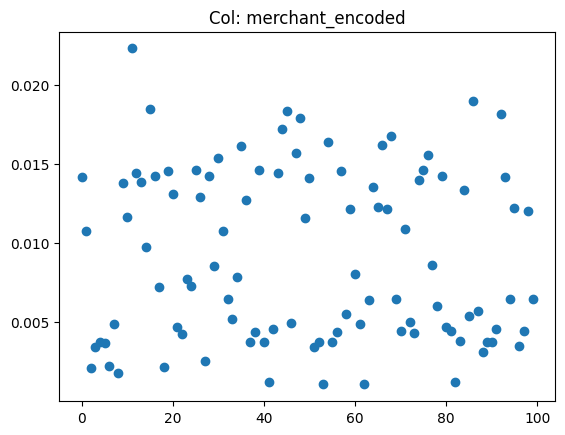

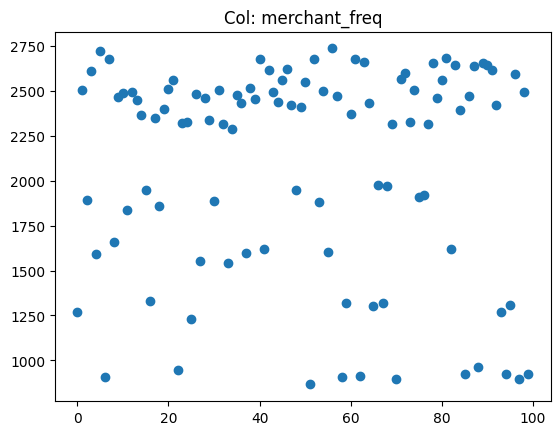

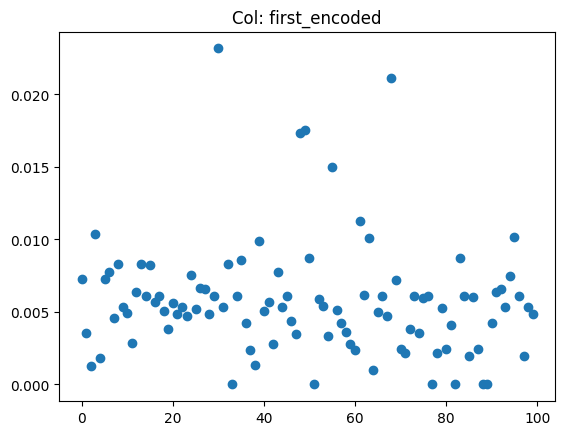

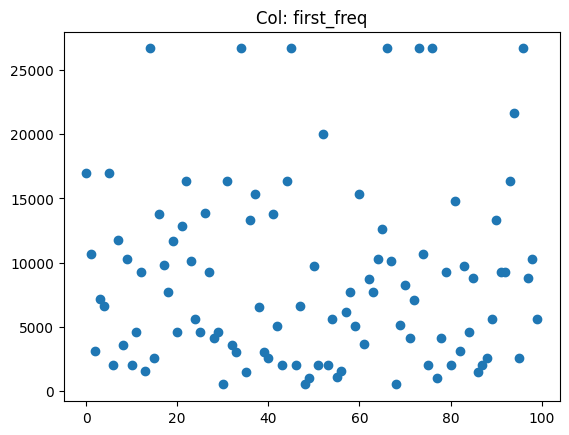

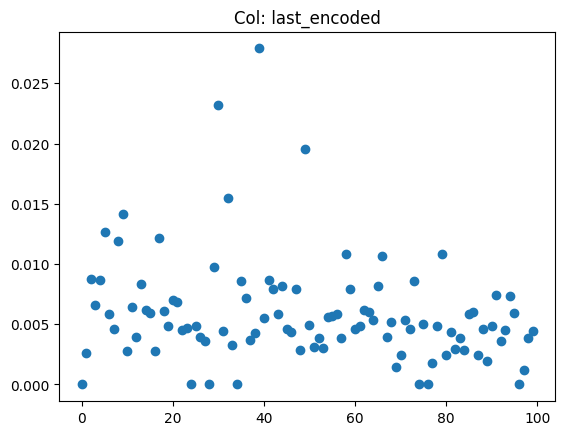

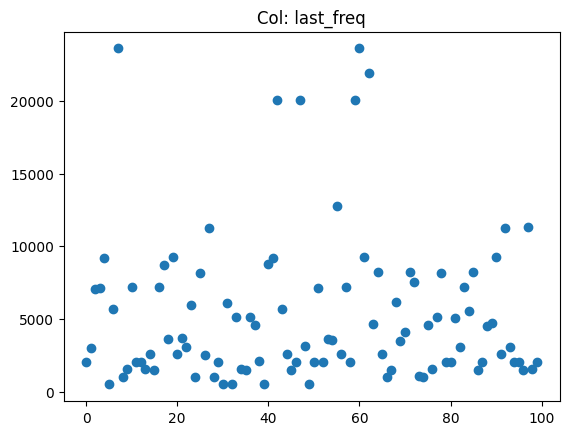

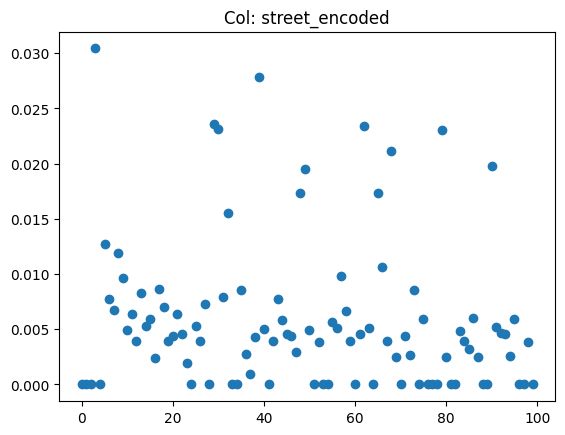

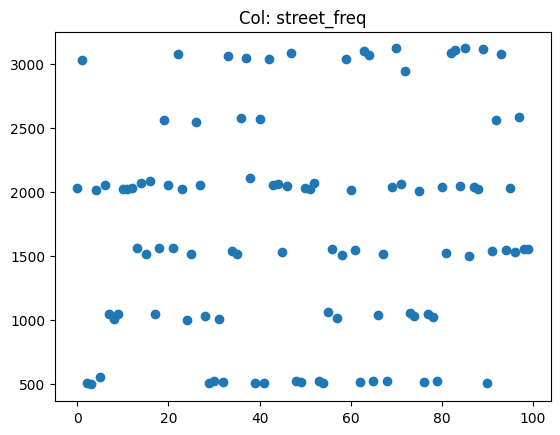

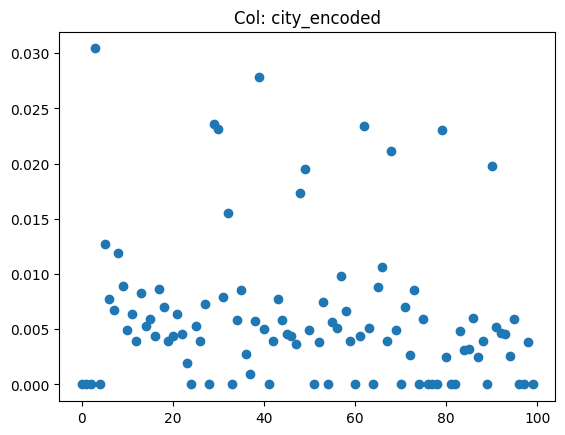

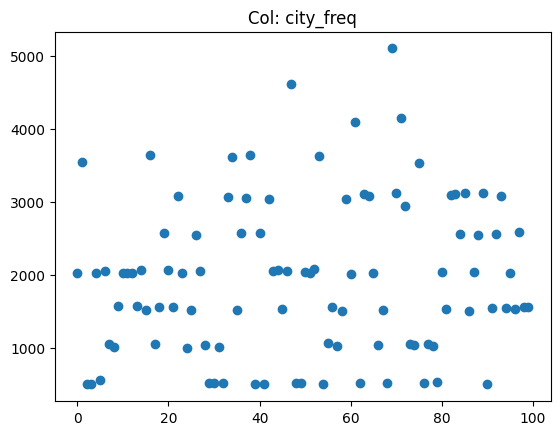

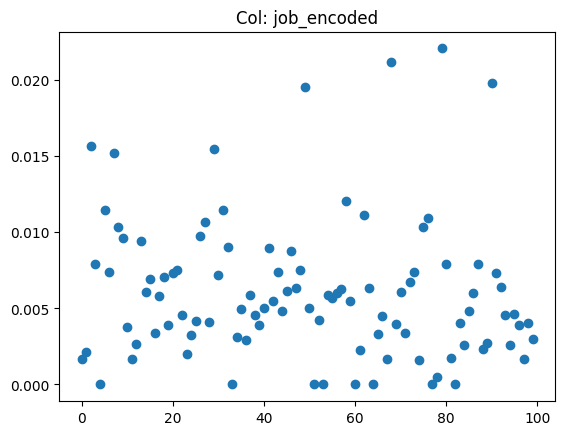

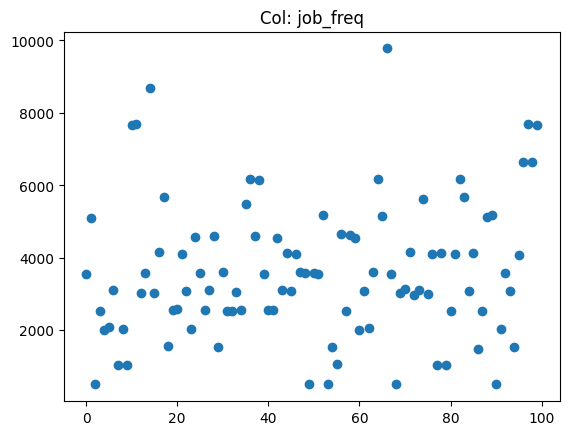

In [20]:
for c in X_smote.columns:
    create_scatter(X_smote[c][0:100], c) 

### Select the continous columns:

Lets select now the continous columns; where we are gonna apply our `Standardscaler()` instance from scikit-learn to perform standardscaling on ONLY the continous features.

In [33]:
#List all the continous features
continous_features = ["cc_num", "amt", "zip", "lat", "long", "city_pop", "unix_time",\
    "merch_lat", "merch_long", "merch_zipcode", "transaction_year", "transaction_month",\
    "transaction_day", "transaction_hour", "transaction_minute", "transaction_second",\
    "birth_year", "birth_month", "birth_day", "merchant_encoded", "merchant_freq",\
    "first_encoded", "first_freq", "last_encoded", "last_freq", "street_encoded",\
    "street_freq", "city_encoded", "city_freq", "job_encoded", "job_freq"]

#Select the continous and not continous 
X_smote_continous = X_smote[continous_features]
X_smote_discontinous = X_smote[[c for c in X_smote.columns if c not in continous_features]]

In [34]:
X_smote_continous.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'merch_zipcode', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour',
       'transaction_minute', 'transaction_second', 'birth_year', 'birth_month',
       'birth_day', 'merchant_encoded', 'merchant_freq', 'first_encoded',
       'first_freq', 'last_encoded', 'last_freq', 'street_encoded',
       'street_freq', 'city_encoded', 'city_freq', 'job_encoded', 'job_freq'],
      dtype='object')

In [38]:
X_smote_continous.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,merch_zipcode,...,first_encoded,first_freq,last_encoded,last_freq,street_encoded,street_freq,city_encoded,city_freq,job_encoded,job_freq
count,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,...,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06
mean,4.097457e+17,2.979165e+02,4.840212e+04,3.860091e+01,-9.006659e+01,9.307303e+04,1.348808e+09,3.859672e+01,-9.006630e+01,4.618418e+04,...,9.798540e-03,7.935606e+03,1.069867e-02,5.979323e+03,2.126543e-02,1.551825e+03,1.829186e-02,1.812623e+03,1.132891e-02,3.669372e+03
std,1.294360e+18,3.449580e+02,2.706868e+04,5.119662e+00,1.401692e+01,3.135570e+05,1.333721e+07,5.153684e+00,1.403192e+01,2.338677e+04,...,3.110335e-02,6.456486e+03,3.549421e-02,6.225204e+03,6.109171e-02,8.232592e+02,5.456516e-02,1.069367e+03,3.776948e-02,2.085429e+03
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,1.001000e+03,...,0.000000e+00,7.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,7.000000e+00
25%,1.800401e+14,3.497032e+01,2.510600e+04,3.486980e+01,-9.676970e+01,7.440000e+02,1.337439e+09,3.492420e+01,-9.677204e+01,2.875200e+04,...,4.646613e-03,2.603000e+03,4.317959e-03,2.034000e+03,3.924133e-03,1.019000e+03,3.937008e-03,1.029000e+03,4.108463e-03,2.063000e+03
50%,3.524575e+15,1.142900e+02,4.751500e+04,3.940150e+01,-8.696570e+01,2.526000e+03,1.349016e+09,3.939257e+01,-8.716777e+01,4.586000e+04,...,5.888517e-03,6.094000e+03,5.809450e-03,3.599000e+03,6.451613e-03,1.538000e+03,6.422925e-03,1.558000e+03,6.153846e-03,3.545000e+03
75%,4.651007e+15,5.241793e+02,7.185400e+04,4.194880e+01,-8.006380e+01,2.112500e+04,1.359757e+09,4.196762e+01,-8.006322e+01,6.333300e+04,...,7.799443e-03,1.181500e+04,8.674404e-03,8.177000e+03,1.058710e-02,2.062000e+03,9.803922e-03,2.543000e+03,8.945841e-03,5.120000e+03
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,9.940300e+04,...,4.780597e-01,2.666900e+04,4.780597e-01,2.879400e+04,4.780597e-01,3.123000e+03,4.780597e-01,5.617000e+03,4.780597e-01,9.779000e+03


In [36]:
X_smote_discontinous.describe()

,gender,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
count,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,...,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06,2.578338e+06
mean,5.216401e-01,4.468278e-02,9.295673e-02,2.684229e-02,1.683121e-01,4.193627e-02,5.943912e-02,5.892929e-02,8.524434e-02,4.773990e-02,...,9.538206e-03,1.616852e-02,6.851190e-02,8.222051e-03,2.457545e-02,9.275355e-03,1.366074e-02,2.214587e-02,1.959888e-02,1.479946e-02
std,4.991783e-01,2.000554e-01,2.703467e-01,1.531750e-01,3.371529e-01,1.940953e-01,2.292311e-01,2.264930e-01,2.496143e-01,2.017093e-01,...,9.711261e-02,1.260377e-01,2.523567e-01,9.024539e-02,1.547747e-01,9.586097e-02,1.160781e-01,1.470801e-01,1.384156e-01,1.207495e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [37]:
X_smote_discontinous.columns

Index(['gender', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'st

### Lets implement the standardscaler to continous features

In [46]:
# Importing standard scaler
from sklearn.preprocessing import StandardScaler

#Create a standard scaler object and fit x_train
standard_scaler = StandardScaler()
standard_scaler.fit(X_smote_continous)

#Transform x_train and x_test
X_continous_scaled = standard_scaler.transform(X_smote_continous)

In [41]:
X_continous_scaled.shape

(2578338, 31)

### Lets see the histograms!

C:\Users\ajedr\AppData\Local\Temp\ipykernel_9340\3532012491.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


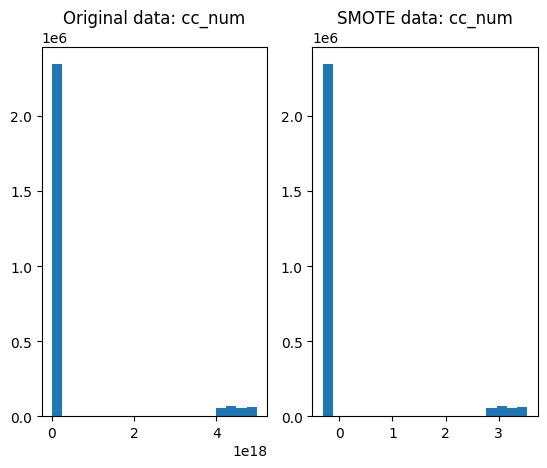

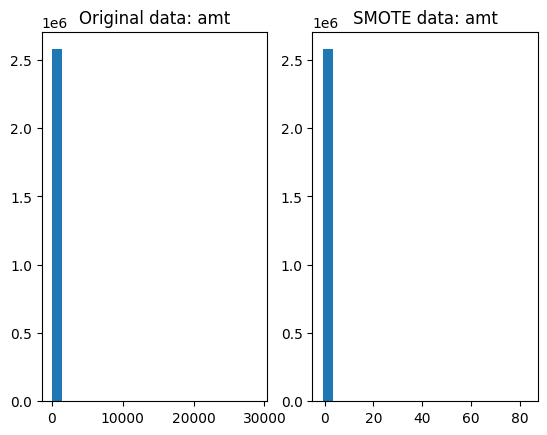

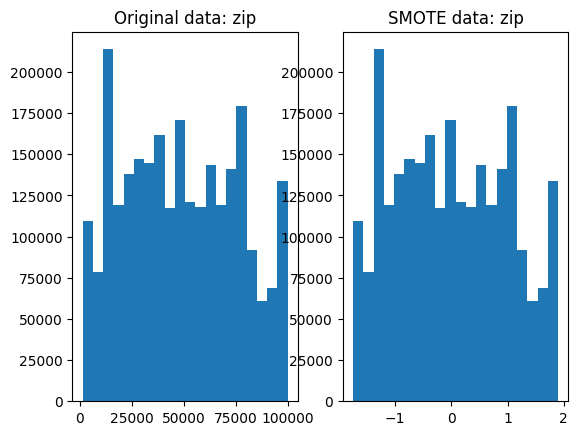

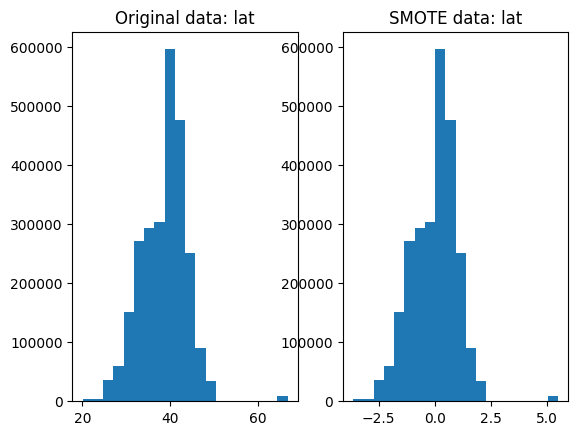

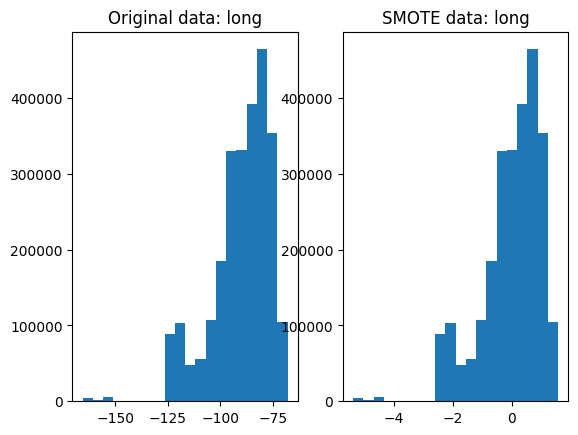

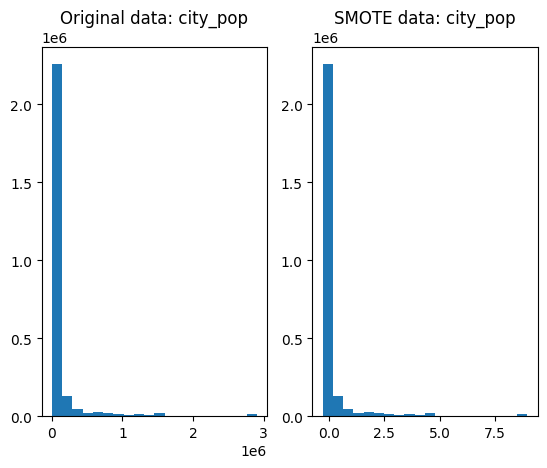

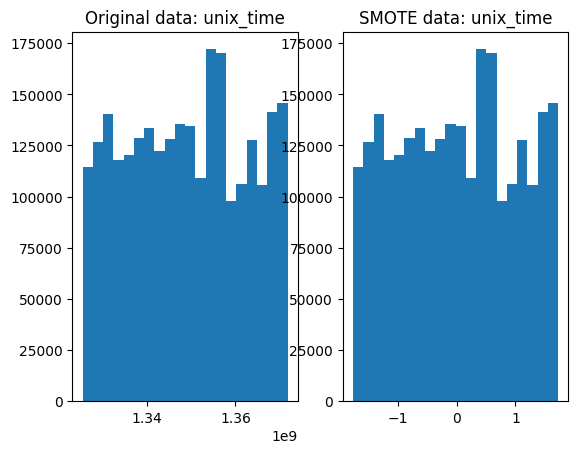

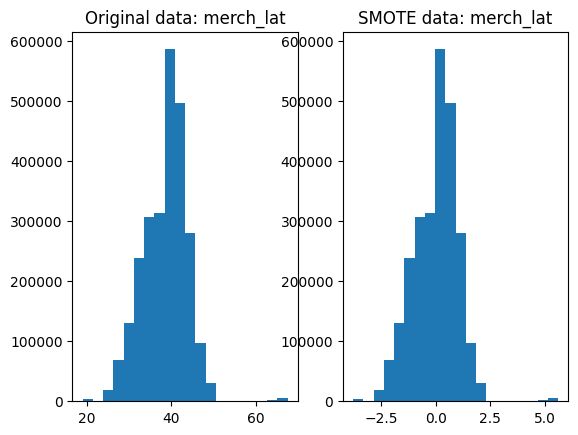

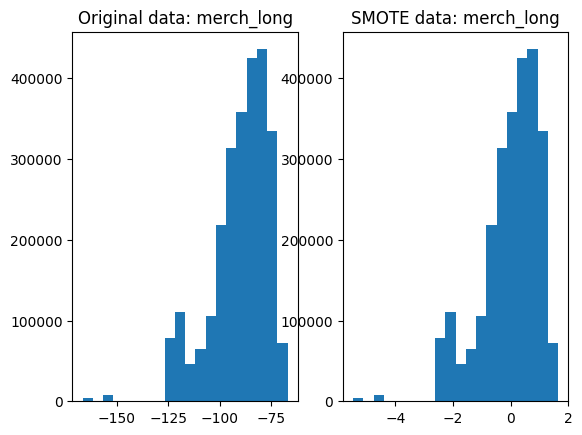

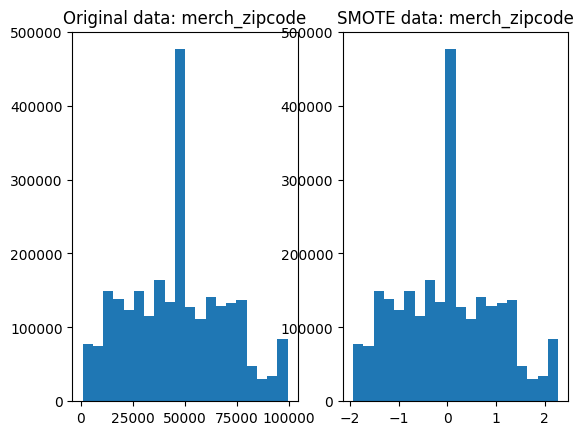

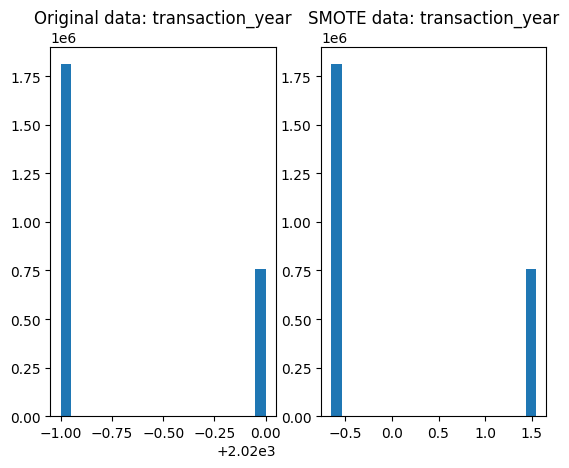

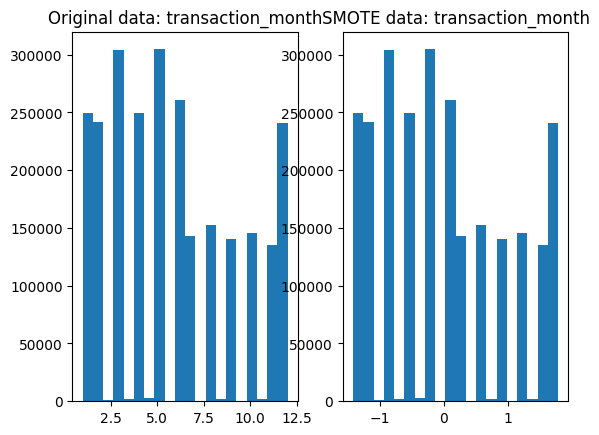

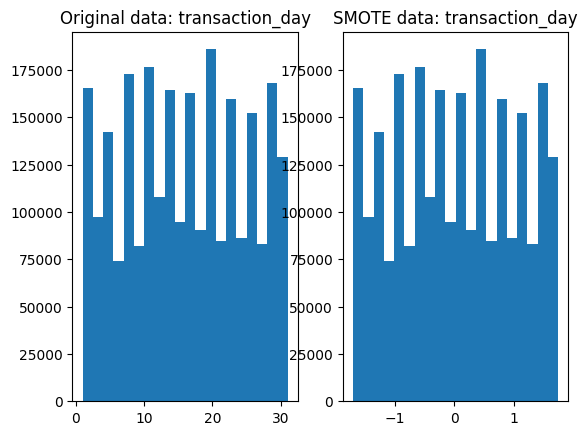

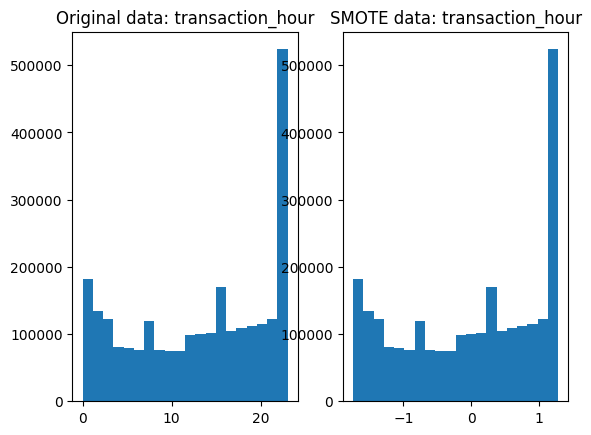

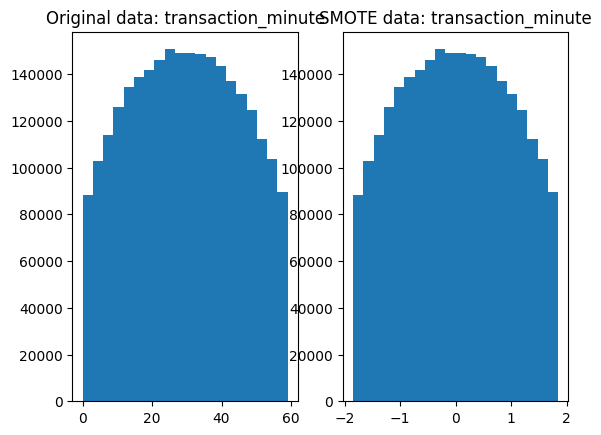

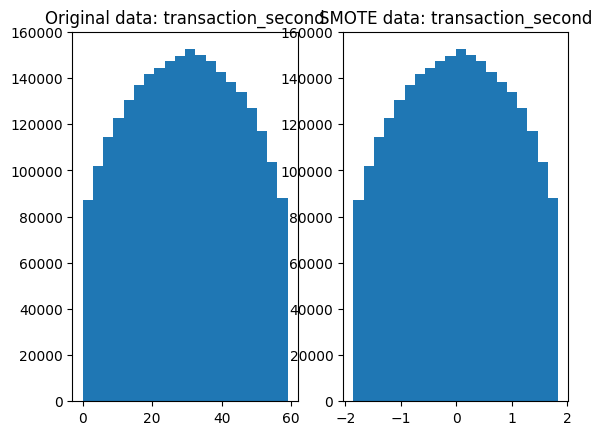

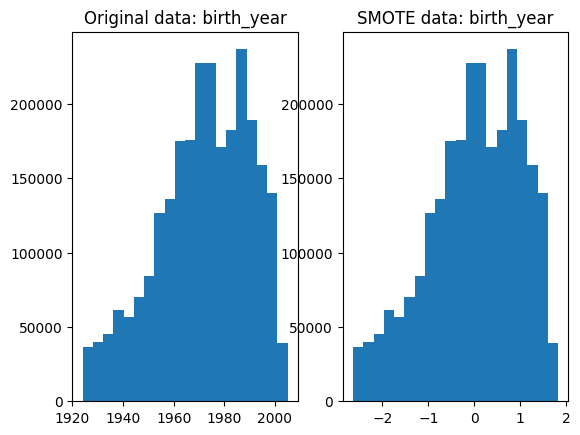

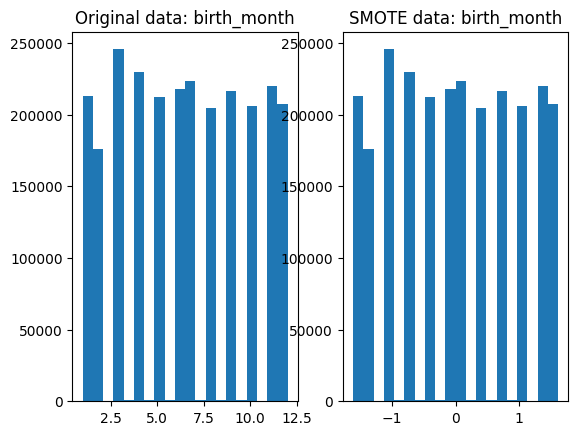

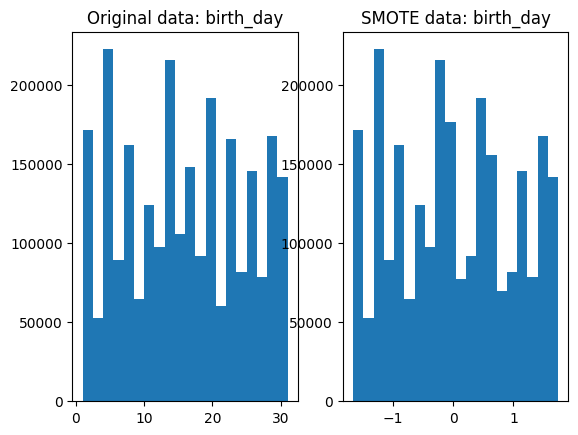

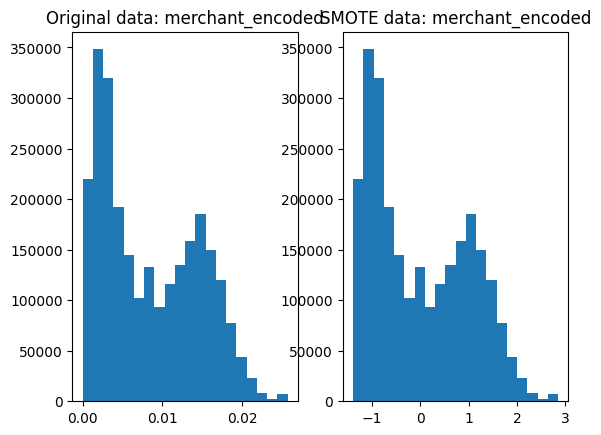

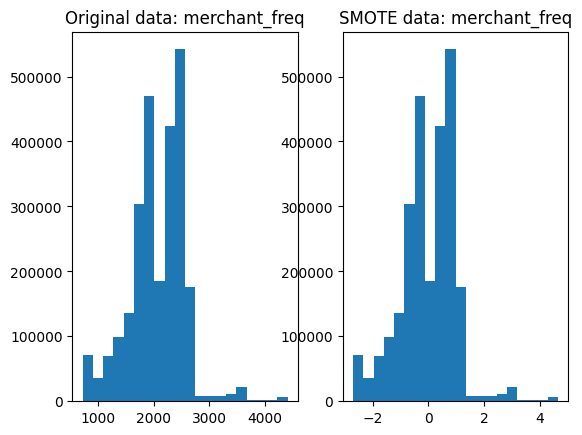

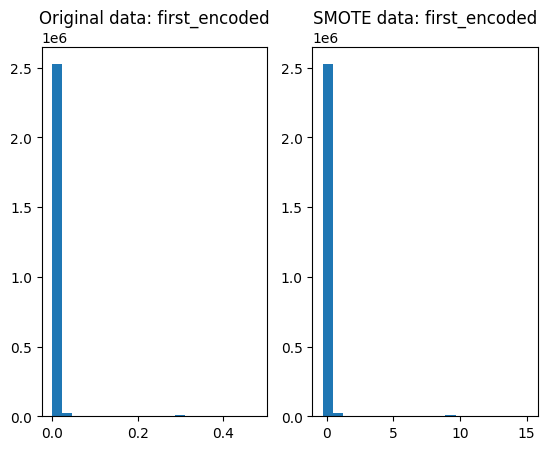

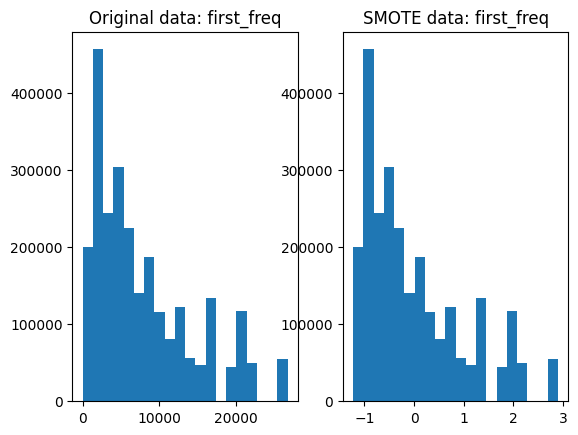

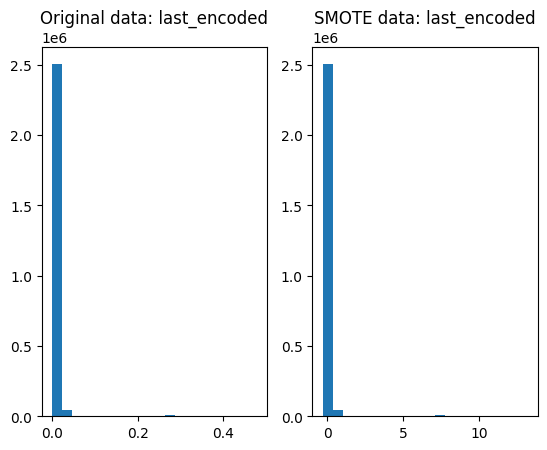

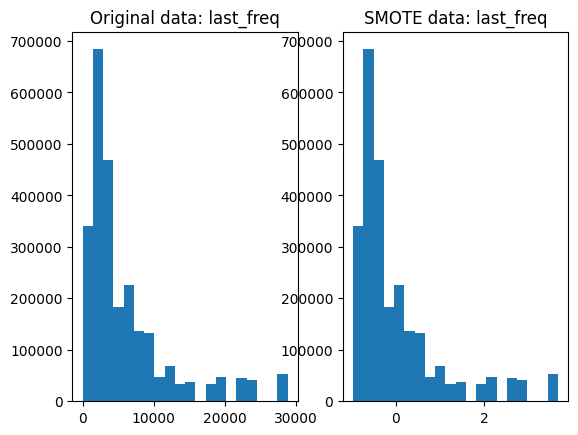

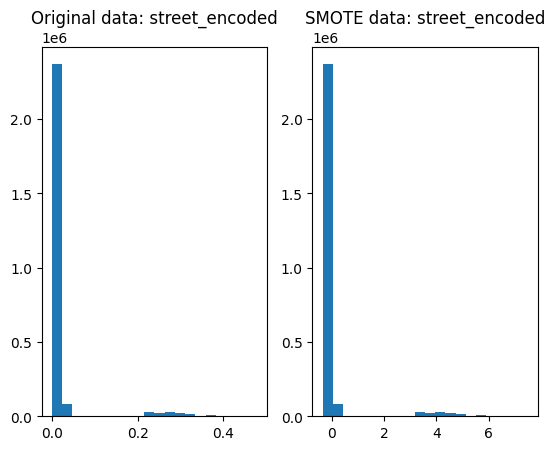

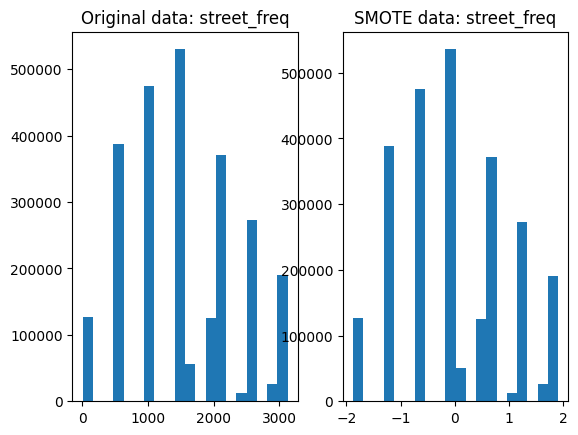

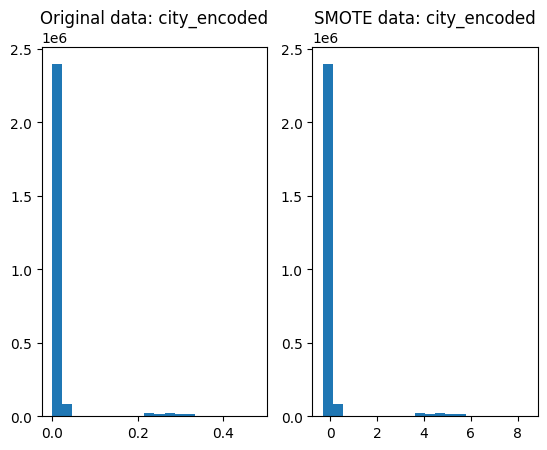

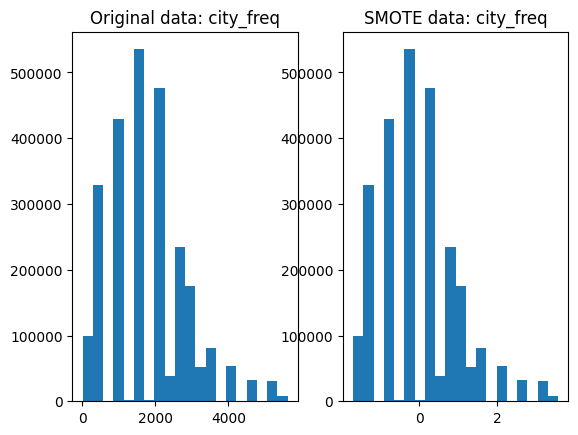

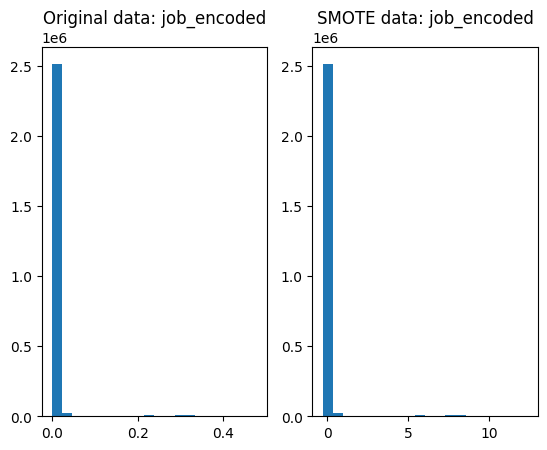

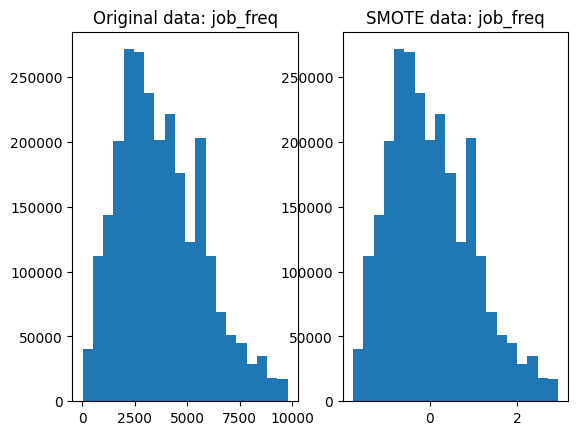

In [47]:
def create_histogram(data_1, data_2, col, num):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.hist(data_1, bins = num)
    plt.title(f"Original data: {col}")
    plt.subplot(1, 2, 2)
    plt.hist(data_2, bins = num)
    plt.title(f"SMOTE data: {col}")

for i, c in enumerate(X_smote_continous.columns):
    create_histogram(X_smote[c], X_continous_scaled[:, i], c, num=20)

### Observations.

The distributions of the continous features didnt change; but the ranges are smaller; which would help ML algorithsm when eprforming gradient descent to the local minima to converge faster. Nervtherless, for the entropy criterion of the randomforests or tree search algorithsm; this extra step would not make too much of a dent.